In [2]:
!pip install opencv-python mediapipe matplotlib numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 52.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 18.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-api-core 1.34.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<4.0.0dev,>=3.19.5, but you have protobuf 4.25.6 which is incompatible.
google-cloud-bigtable 2.27.0 requires google-api-core[grpc]<3.0.0dev,>=2.16.0, but you have google-api-core 1.34.1 which is incompatible.
pandas-gbq 0.25.0 requires google-api-core<3.0.0dev,>=2.10.2, but you have google-api-core 1.34.1 which is incompatible.
tensorflow-decision-forests 1.10.0 requires tens

In [1]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

# Initialize MediaPipe FaceMesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, refine_landmarks=True)


I0000 00:00:1743180076.410834   68765 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1743180076.417222   68875 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.3), renderer: Mesa Intel(R) Graphics (ADL GT2)
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


W0000 00:00:1743180076.428951   68854 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1743180076.481614   68848 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [46]:
# Read images
img1 = cv2.imread('srk.jpg')
img2 = cv2.imread('image.png')

/tmp/ipykernel_68765/1539602287.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


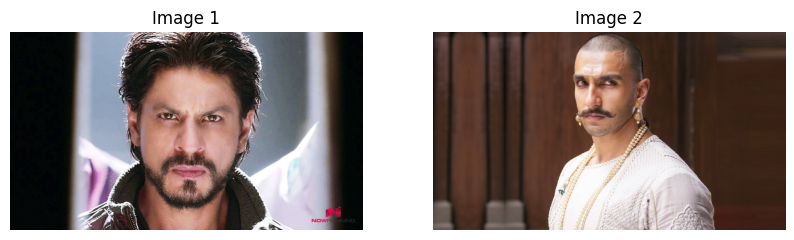

In [47]:
#Convert images to grayscale from RGB
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

fig, axs = plt.subplots(1,2,figsize=(10,10));

axs[0].imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB));
axs[0].set_title("Image 1")

axs[1].imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB));
axs[1].set_title("Image 2")

[axi.axis('off') for axi in axs.ravel()]
fig.show()

In [48]:
# Initialize MediaPipe FaceMesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, refine_landmarks=True)

I0000 00:00:1743181027.712802   68765 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1743181027.715448   76101 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.3), renderer: Mesa Intel(R) Graphics (ADL GT2)


In [49]:
# Function to get the landmark points given a grayscale image as input
def get_landmarks(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB (MediaPipe expects RGB)
    results = face_mesh.process(img_rgb)
    
    height, width, _ = img.shape
    landmarks_points = []

    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            for landmark in face_landmarks.landmark:
                x, y = int(landmark.x * width), int(landmark.y * height)
                landmarks_points.append((x, y))

    points = np.array(landmarks_points, np.int32)
    return points, landmarks_points


W0000 00:00:1743181027.724972   76090 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [50]:
# Function to get the convex hull of detected landmarks
def get_convexhull(img, points):
    height, width, _ = img.shape
    mask = np.zeros((height, width), np.uint8)  # Create an empty mask
    convexhull = cv2.convexHull(points)  # Compute convex hull
    return convexhull


W0000 00:00:1743181027.767598   76089 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


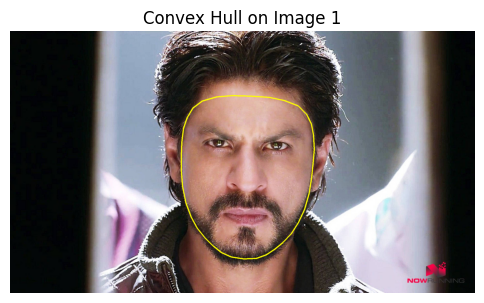

In [51]:
# Get landmark points and convex hull for Image 1
img1_points, img1_landmarks = get_landmarks(img1)  # Already uses MediaPipe
img1_convex = get_convexhull(img1, img1_points)  # Compute convex hull

# Copy of image to visualize convex hull
img1_cp = img1.copy()

# Draw convex hull on the image
cv2.polylines(img1_cp, [img1_convex], isClosed=True, color=(0, 255, 255), thickness=3)

# Display image with convex hull
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(img1_cp, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Convex Hull on Image 1")
plt.show()


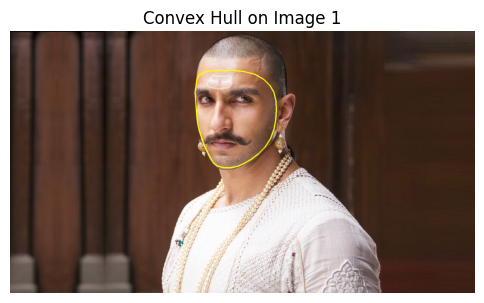

In [52]:
# Get landmark points and convex hull for Image 1
img2_points, img2_landmarks = get_landmarks(img2)  # Already uses MediaPipe
img2_convex = get_convexhull(img2, img2_points)  # Compute convex hull

# Copy of image to visualize convex hull
img2_cp = img2.copy()

# Draw convex hull on the image
cv2.polylines(img2_cp, [img2_convex], isClosed=True, color=(0, 255, 255), thickness=3)

# Display image with convex hull
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(img2_cp, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Convex Hull on Image 1")
plt.show()

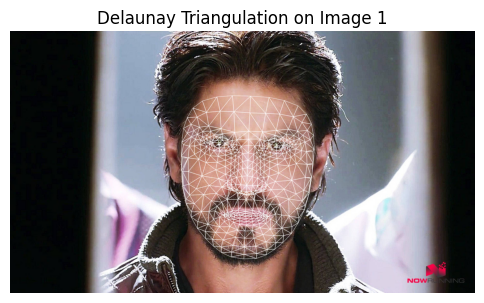

In [53]:
# Get the bounding rectangle around the convex hull
bound_rect = cv2.boundingRect(img1_convex)

# Initialize Subdiv2D with bounding rectangle
points_subdiv = cv2.Subdiv2D(bound_rect)
points_subdiv.insert(img1_landmarks)  # Insert MediaPipe landmark points

# Create the Delaunay triangle list
triangles = points_subdiv.getTriangleList()
triangles = np.array(triangles, dtype=np.int32)

triangle_coords = []
img1_cp = img1.copy()

# Function to get index of a point in the landmarks array
def get_index(arr):
    if len(arr[0]) > 0:
        return arr[0][0]
    return None

# Loop to extract triangle coordinates
for triangle in triangles:
    # Extract vertex coordinates
    pt1 = (triangle[0], triangle[1])
    pt2 = (triangle[2], triangle[3])
    pt3 = (triangle[4], triangle[5])
    
    # Draw triangle on the image
    cv2.line(img1_cp, pt1, pt2, (255, 255, 255), 1, cv2.LINE_AA)
    cv2.line(img1_cp, pt2, pt3, (255, 255, 255), 1, cv2.LINE_AA)
    cv2.line(img1_cp, pt3, pt1, (255, 255, 255), 1, cv2.LINE_AA)

    # Get indices of landmark points for triangulation
    index_pt1 = get_index(np.where((img1_points == pt1).all(axis=1)))
    index_pt2 = get_index(np.where((img1_points == pt2).all(axis=1)))
    index_pt3 = get_index(np.where((img1_points == pt3).all(axis=1)))

    # Append triangle if all indices are valid
    if index_pt1 is not None and index_pt2 is not None and index_pt3 is not None:
        triangle_coords.append([index_pt1, index_pt2, index_pt3])

# Display triangulated image
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(img1_cp, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Delaunay Triangulation on Image 1")
plt.show()


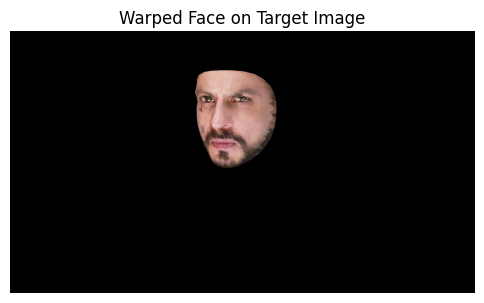

In [54]:
# Initialize empty images for blending
height, width, channels = img2.shape
new_img1 = np.zeros((height, width, channels), np.uint8)
img2_new_img1 = np.zeros((height, width, channels), np.uint8)

# Create an empty mask for Image 1
height, width = img1_gray.shape
new_img_mask = np.zeros((height, width), np.uint8)

# Loop through each Delaunay triangle and warp it to the target face
for triangle in triangle_coords:
    # Get triangle points from Image 1
    pt1, pt2, pt3 = img1_landmarks[triangle[0]], img1_landmarks[triangle[1]], img1_landmarks[triangle[2]]

    # Bounding box around the triangle
    x, y, w, h = cv2.boundingRect(np.array([pt1, pt2, pt3], np.int32))
    cropped_triangle = img1[y: y+h, x: x+w]

    # Create a mask for the triangle
    cropped_mask = np.zeros((h, w), np.uint8)
    points = np.array([[pt1[0]-x, pt1[1]-y], [pt2[0]-x, pt2[1]-y], [pt3[0]-x, pt3[1]-y]], np.int32)
    cv2.fillConvexPoly(cropped_mask, points, 255)

    # Draw triangles on mask
    cv2.line(new_img_mask, pt1, pt2, 255)
    cv2.line(new_img_mask, pt2, pt3, 255)
    cv2.line(new_img_mask, pt1, pt3, 255)

    # Bitwise operation for triangle extraction
    lines_space = cv2.bitwise_and(img1, img1, mask=new_img_mask)

    # Get triangle points from Image 2
    pt1, pt2, pt3 = img2_landmarks[triangle[0]], img2_landmarks[triangle[1]], img2_landmarks[triangle[2]]

    # Bounding box for Image 2 triangle
    x, y, w, h = cv2.boundingRect(np.array([pt1, pt2, pt3], np.int32))
    cropped_mask2 = np.zeros((h, w), np.uint8)

    # Fill triangle mask for Image 2
    points2 = np.array([[pt1[0]-x, pt1[1]-y], [pt2[0]-x, pt2[1]-y], [pt3[0]-x, pt3[1]-y]], np.int32)
    cv2.fillConvexPoly(cropped_mask2, points2, 255)

    # Warp triangles using Affine Transform
    points = np.float32(points)
    points2 = np.float32(points2)
    M = cv2.getAffineTransform(points, points2)
    dist_triangle = cv2.warpAffine(cropped_triangle, M, (w, h))
    dist_triangle = cv2.bitwise_and(dist_triangle, dist_triangle, mask=cropped_mask2)

    # Combine warped triangle with Image 2
    img2_new_img1_bound_rect_area = img2_new_img1[y: y+h, x: x+w]
    img2_new_img1_bound_rect_area_gray = cv2.cvtColor(img2_new_img1_bound_rect_area, cv2.COLOR_BGR2GRAY)

    # Create inverse mask for blending
    masked_triangle = cv2.threshold(img2_new_img1_bound_rect_area_gray, 1, 255, cv2.THRESH_BINARY_INV)
    dist_triangle = cv2.bitwise_and(dist_triangle, dist_triangle, mask=masked_triangle[1])

    # Update final blended face
    img2_new_img1_bound_rect_area = cv2.add(img2_new_img1_bound_rect_area, dist_triangle)
    img2_new_img1[y: y+h, x: x+w] = img2_new_img1_bound_rect_area

# Display final swapped image
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(img2_new_img1, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Warped Face on Target Image")
plt.show()


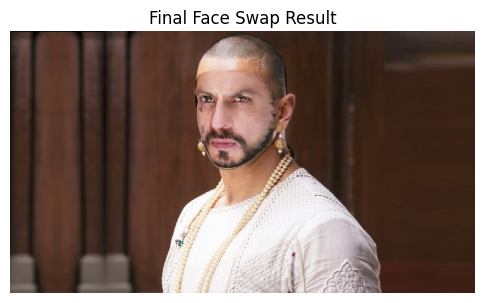

In [55]:
# Create an empty mask for Image 2
img2_img1_mask = np.zeros_like(img2_gray)

# Create a filled convex mask using Image 2's landmarks
img2_head_mask = cv2.fillConvexPoly(img2_img1_mask, img2_convex, 255)

# Create an inverse mask to remove face region from Image 2
img2_img1_mask = cv2.bitwise_not(img2_head_mask)

# Remove the original face from Image 2
img2_maskless = cv2.bitwise_and(img2, img2, mask=img2_img1_mask)

# Blend the new swapped face with the original image
result = cv2.add(img2_maskless, img2_new_img1)

# Display the final face-swapped image
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Final Face Swap Result")
plt.show()


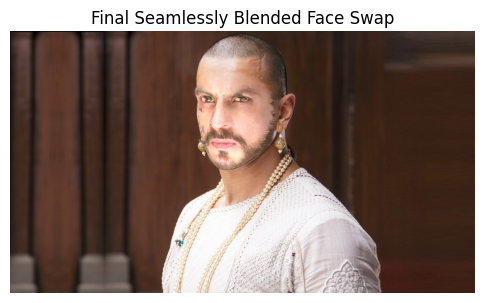

In [56]:
# Get the bounding box around the convex hull of the swapped face
x, y, w, h = cv2.boundingRect(img2_convex)

# Compute the face center for seamless cloning
face_center = (int(x + w / 2), int(y + h / 2))

# Perform seamless cloning to blend the swapped face naturally
seamlessclone = cv2.seamlessClone(result, img2, img2_head_mask, face_center, cv2.NORMAL_CLONE)

# Display the final face-swapped image with seamless blending
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(seamlessclone, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Final Seamlessly Blended Face Swap")
plt.show()
